## Compraventa de viviendas en España

Vamos a realizar un análisis del mercado de la vivienda según su regimen y estado de todo el pais con los datos que nos proporciona el gobierno.

En primer lugar vamos a leer los datos utilizados para este análisis.
Los datos utilizados son de:
https://datos.gob.es/es/catalogo/ea0010587-compraventa-de-viviendas-segun-regimen-y-estado-etdp-identificador-api-49280

Vamos a definir primero los Regimenes y estados que nos podemos encontrar:

-Viviendas protegidas:Esta característica implica que la vivienda está sujeta a un régimen legal especial que busca garantizar el acceso a la vivienda digna para personas con rentas medias o bajas.

-Viviendas libres:La vivienda no tiene ninguna protección de preciopara el nuevo propietario.

-Vivienda usada:La vivienda ha sido habitada.

-Vivienda nueva:Vivienda de nueva construcción, no ha sido habitada.

In [1]:
import pandas as pd
import numpy as np
datos = pd.read_csv('DATOS.csv',sep=';', encoding='utf-8')


En primer lugar vamos a limpiar los datos, 
ya que podemos observar que los datos a nivel nacional carecen de valores(Comunidades y Ciudades Autónomas y Provincia)

In [2]:
datos.rename(columns={"Total',,": 'Total'}, inplace=True)
tipos_vivienda = ['Viviendas: Total','Vivienda nueva', 'Vivienda usada', 'Vivienda libre', 'Vivienda protegida']
filtro = datos["Comunidades y Ciudades Autónomas"].isin(tipos_vivienda)

#limpiamos las columnas 
datos['Régimen y estado'] = datos['Régimen y estado'].str.replace("'", "").str.replace(",", "")
datos['Total'] = datos['Total'].str.replace("'", "").str.replace(",", "")
#cambiamos los datos a donde corresponde
datos.loc[filtro, "Periodo"] = pd.to_numeric(datos.loc[filtro, "Provincias"], errors='coerce')
datos.loc[filtro, "Total"] = pd.to_numeric(datos.loc[filtro, "Régimen y estado"], errors='coerce')
datos.loc[filtro,'Régimen y estado'] =datos.loc[filtro, "Comunidades y Ciudades Autónomas"]
#rellenamos los datos que no existen con nan
datos.loc[filtro, "Provincias"] = np.nan
datos.replace(datos.loc[filtro, "Total"], datos.loc[filtro, "Régimen y estado"], inplace=True)
 
print(datos)
print(datos.columns)

datos.to_csv('Datoscorr.csv', index=False)

      'Total Nacional Comunidades y Ciudades Autónomas  Provincias  \
0     'Total Nacional                 Viviendas: Total         NaN   
1     'Total Nacional                 Viviendas: Total         NaN   
2     'Total Nacional                 Viviendas: Total         NaN   
3     'Total Nacional                 Viviendas: Total         NaN   
4     'Total Nacional                 Viviendas: Total         NaN   
...               ...                              ...         ...   
6115  'Total Nacional                       19 Melilla  52 Melilla   
6116  'Total Nacional                       19 Melilla  52 Melilla   
6117  'Total Nacional                       19 Melilla  52 Melilla   
6118  'Total Nacional                       19 Melilla  52 Melilla   
6119  'Total Nacional                       19 Melilla  52 Melilla   

        Régimen y estado  Periodo    Total  
0       Viviendas: Total   2023.0  586.913  
1       Viviendas: Total   2022.0  650.265  
2       Viviendas: Total

Vamos a visualizar algunas filas del archivo.

Este archivo cuenta con las siguientes cabeceras:


A continuación vamos a realizar la visualización de los datos a nivel nacional por regimen de vivienda en el año 2023.
El primer paso es recolectar los datos necesarios, como la cantidad de viviendas totales en ese año y los tipos.

In [21]:
viv2023_totales = datos[(datos["Régimen y estado"] == 'Viviendas: Total') & (datos["Comunidades y Ciudades Autónomas"]== 'Viviendas: Total') & (datos["Periodo"] == 2023.0)]

reg_vivienda = ['Vivienda nueva', 'Vivienda usada']
reg_pago = ['Vivienda libre', 'Vivienda protegida']

viv2023_tipos = datos[(datos["Régimen y estado"] != 'Viviendas: Total')& (datos["Comunidades y Ciudades Autónomas"].isin(reg_vivienda)) & (datos["Periodo"] == 2023.0) ]
viv2023_pago = datos[(datos["Régimen y estado"] != 'Viviendas: Total')& (datos["Comunidades y Ciudades Autónomas"].isin(reg_pago)) & (datos["Periodo"] == 2023.0) ]


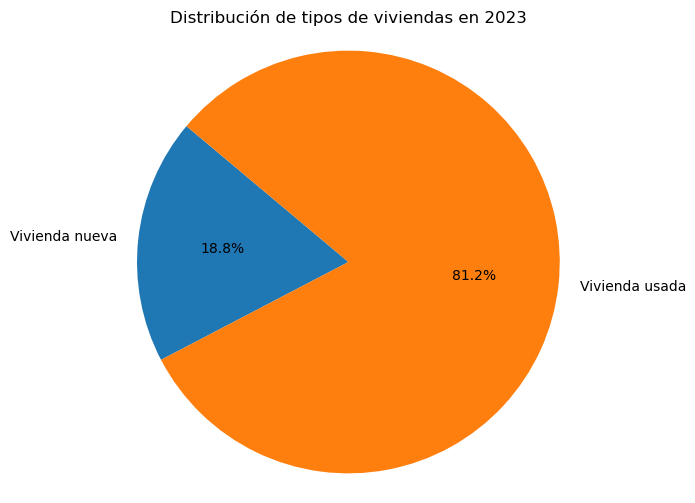

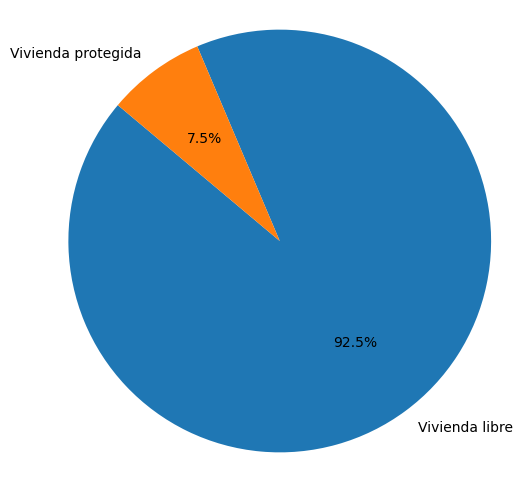

In [22]:
import matplotlib.pyplot as plt
# Extraemos los valores y las etiquetas
valores = viv2023_tipos['Total']
etiquetas = viv2023_tipos['Comunidades y Ciudades Autónomas']

plt.figure(figsize=(6, 6))
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de tipos de viviendas en 2023')
plt.axis('equal')
plt.show()

# Extraemos los valores y las etiquetas
valores2 = viv2023_pago['Total']
etiquetas2 = viv2023_pago['Comunidades y Ciudades Autónomas']
plt.figure(figsize=(6, 6))
plt.pie(valores2, labels=etiquetas2, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

Como podemos observar a nivel nacional el mercado inmobiliario español  se mueve por viviendas usadas, hay escasez de vivienda protegida y además no se construye mucho, respecto a la vivienda usada

Por otro lado vamos a representar la fluctuación de los tipos de viviendas en el mercado a lo largo de los años

16    775300
15    552080
14    413393
13    439591
12    359824
11    318534
10    312593
9     318830
8     355556
7     405385
6     467644
5     517984
4     505467
3     420238
2     566485
1     650265
0     586913
Name: Total, dtype: int64


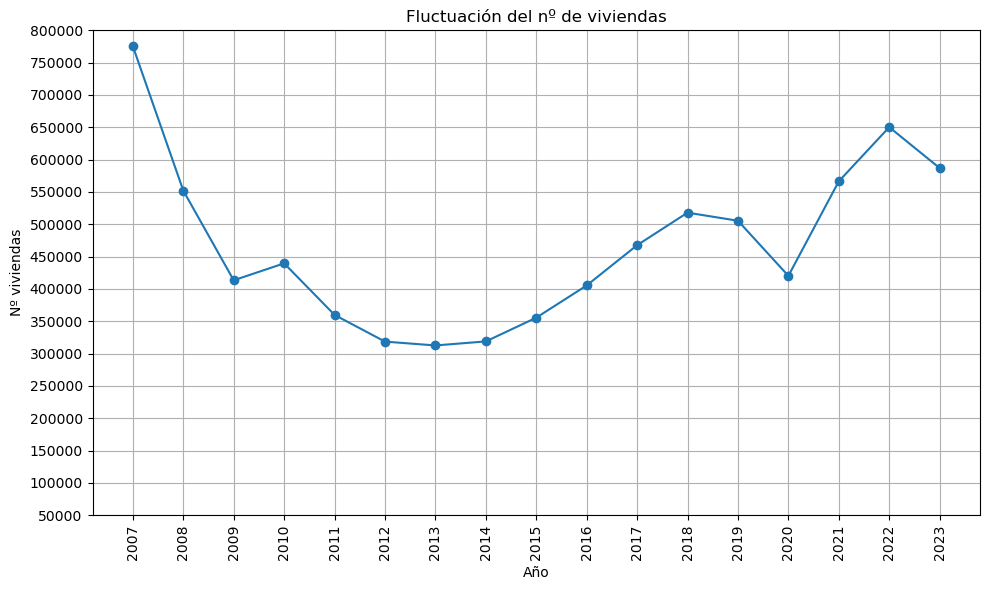

In [5]:
# Necesitamos una función que nos rellene los decimales hasta 3

def format_value(value):
    if '.' in str(value):
        formatted_value = f"{value:.3f}"
        parts = formatted_value.split(".")
        integer_part = parts[0] 
        decimal_part = parts[1] 
        return int(integer_part + decimal_part)
    else:
        return int(value)

# Limpiamos las columnas
viviendas_totales = datos.loc[datos['Comunidades y Ciudades Autónomas'].str.contains('Viviendas: Total', case=False, na=False)].copy()
viviendas_totales['Régimen y estado'] = viviendas_totales['Régimen y estado'].str.replace("'", "").str.replace(",", "").str.replace(".", "")
viviendas_totales['Régimen y estado'] = pd.to_numeric(viviendas_totales['Régimen y estado'], errors='coerce')
viviendas_totales_sorted = viviendas_totales.sort_values(by='Periodo', ascending=True)

# Aquí llamamos a la función y además lo convertimos a integer y formamos los valores de la gráfica
valores_y = viviendas_totales_sorted['Total'].astype(float).apply(format_value)
valores_x = viviendas_totales_sorted["Periodo"].sort_values(ascending=True)
print(valores_y)
# Comenzamos a formar la gráfica
plt.figure(figsize=(10, 6))
plt.plot(valores_x, valores_y, marker='o', linestyle='-')
plt.title('Fluctuación del nº de viviendas')
plt.xlabel('Año')
plt.ylabel('Nº viviendas')
plt.grid(True)

# Rotar las etiquetas de los ticks en el eje x
plt.xticks(rotation=90)  
plt.xticks(valores_x)

# Aquí ponemos los rangos de los valores de la gráfica 
# Valor desde donde empieza, valor desde donde acaba cogiendo el máximo y el incremento 
plt.yticks(range(50000, int(valores_y.max()) + 50000, 50000))
plt.tight_layout() 
plt.show() 



A continuación vamos a representar las cantidades de los tipos de viviendas por cada comunidad autónoma.

In [13]:
# Datos de los tipos de viviendas
def format_value2(value):
    # Comprobar si el valor es una cadena
    if isinstance(value, str):
        # Eliminar el punto decimal si está presente y luego convertir a entero
       
        integer_part, decimal_part = value.split('.')
        decimal_part = decimal_part.ljust(3, '0')
        cleaned_value = integer_part + decimal_part
        return int(cleaned_value)
    else:
        # Si el valor no es una cadena, simplemente convertirlo a entero
        return int(value)

# Aplicar la función a la serie de datos
datos['Total'] = datos['Total'].apply(format_value2)
        

viv_protegida=datos[(datos['Régimen y estado']=='Vivienda protegida') & (datos["Periodo"] == 2023.0)& (datos["Provincias"].isna())& (datos["Comunidades y Ciudades Autónomas"]!='Vivienda protegida') ]
viv_nueva=datos[(datos['Régimen y estado']=='Vivienda nueva') & (datos["Periodo"] == 2023.0)& (datos["Provincias"].isna())& (datos["Comunidades y Ciudades Autónomas"]!='Vivienda nueva') ]
viv_libre=datos[(datos['Régimen y estado']=='Vivienda libre') & (datos["Periodo"] == 2023.0)& (datos["Provincias"].isna())& (datos["Comunidades y Ciudades Autónomas"]!='Vivienda libre') ]
viv_usada=datos[(datos['Régimen y estado']=='Vivienda usada') & (datos["Periodo"] == 2023.0)& (datos["Provincias"].isna())& (datos["Comunidades y Ciudades Autónomas"]!='Vivienda usada') ]
#Lista CCAA
ccaa=viv_protegida["Comunidades y Ciudades Autónomas"]



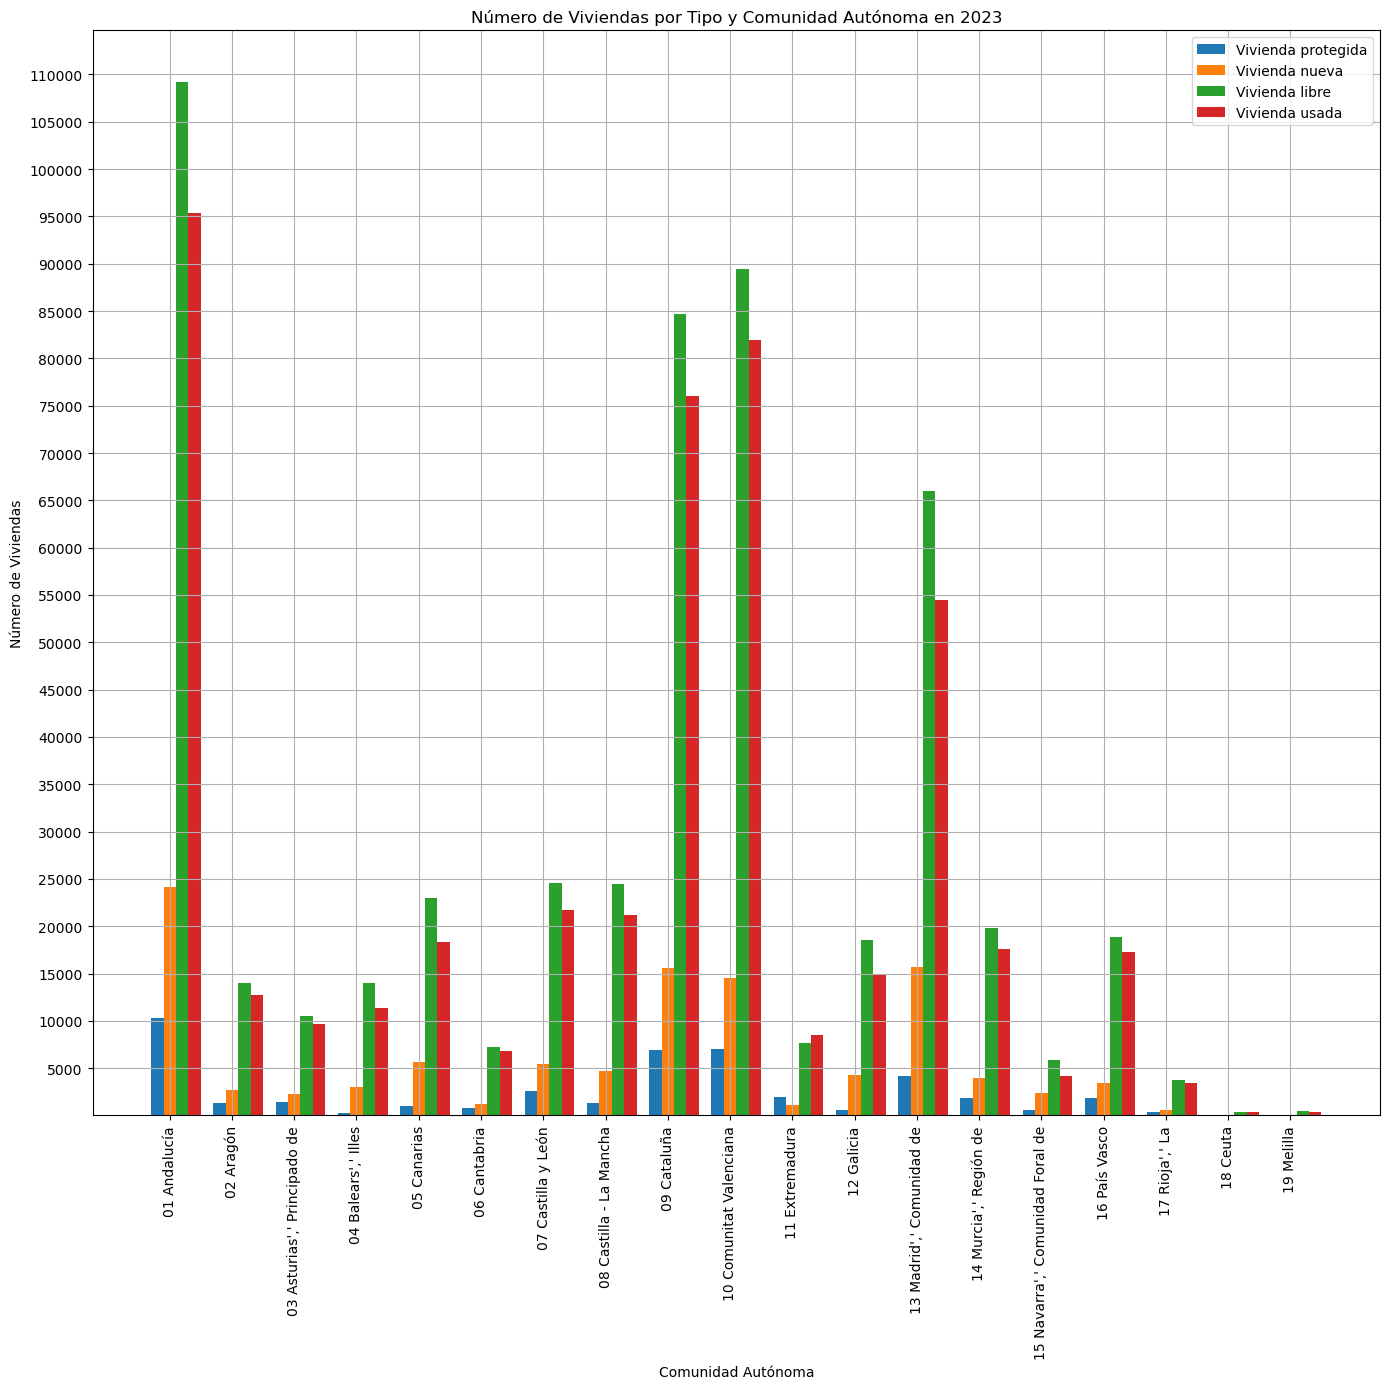

In [12]:
bar_width = 0.2
index = np.arange(len(ccaa))

# Crear el gráfico de barras
plt.figure(figsize=(14, 14))

plt.bar(index - bar_width, viv_protegida.groupby("Comunidades y Ciudades Autónomas")["Total"].sum(), bar_width, label='Vivienda protegida')
plt.bar(index, viv_nueva.groupby("Comunidades y Ciudades Autónomas")["Total"].sum(), bar_width, label='Vivienda nueva')
plt.bar(index + bar_width, viv_libre.groupby("Comunidades y Ciudades Autónomas")["Total"].sum(), bar_width, label='Vivienda libre')
plt.bar(index + 2 * bar_width, viv_usada.groupby("Comunidades y Ciudades Autónomas")["Total"].sum(), bar_width, label='Vivienda usada')

plt.xlabel('Comunidad Autónoma')
plt.ylabel('Número de Viviendas')
plt.title('Número de Viviendas por Tipo y Comunidad Autónoma en 2023')
plt.xticks(index, ccaa, rotation=90)
plt.yticks(range(5000, int(max(viv_libre['Total'])) + 5000, 5000))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()